In [1]:
from Data import *
import os
from tqdm import tqdm

os.chdir('report')

In [2]:
m, n, h = 1000, 1000, 1
data = Data(
    TIs = sorted(list(range(208, 1000, 16))),
    n_iters = m,
    sample_size = n,
    SNR = 10000,
    nullpts = [416, 832],
    thresh = h,
    normalize_each_TI = False,
    flip = False
)
data.generate_data()
# data.save_data()
# data.load_data()

In [3]:
# data for n = 1, m = 10000 (not sure if will use)

# m, n, h = 10000, 1, 1
# data2 = Data(
#     TIs = sorted(list(range(208, 1000, 16))),
#     n_iters = m,
#     sample_size = n,
#     SNR = 10000,
#     nullpts = [416, 832],
#     thresh = h,
#     normalize_each_TI = False,
#     flip = False
# )
# data2.generate_data()
# data2.save_data()
# data2.load_data()

In [4]:
centroids = data.data[:,:,:,:].mean(axis=2)

average_centroid_distances = np.zeros((len(data.TIs), data.sample_size))

for i in tqdm(range(len(data.TIs))):
    for j in range(data.sample_size):
        average_centroid_distances[i, j] = np.mean([np.linalg.norm(point - centroids[i,j]) for point in data.data[i, j, :]])

average_centroid_distances = average_centroid_distances.mean(axis=1)

100%|██████████| 50/50 [02:09<00:00,  2.58s/it]


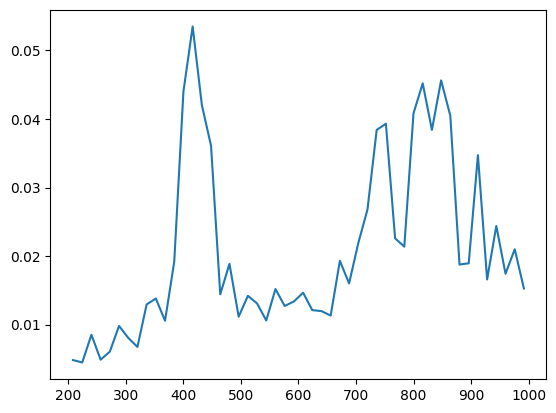

In [5]:
# get the data for the one sample
sample_num = 16

sample0 = np.zeros(len(data.TIs))
for i in range(len(data.TIs)):
    sample0[i] = np.mean([np.linalg.norm(point - centroids[i,sample_num]) for point in data.data[i, sample_num, :]])

plt.plot(data.TIs, sample0)

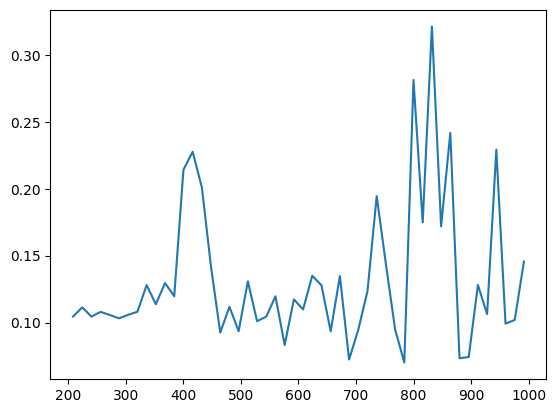

In [6]:
# sample2_num = 16

# sample2 = np.zeros(len(data.TIs))
# for i in range(len(data.TIs)):
#     sample2[i] = np.mean([np.linalg.norm(point - centroids[i,sample2_num]) for point in data2.data[i, 0, :]])

# plt.plot(data.TIs, sample2)

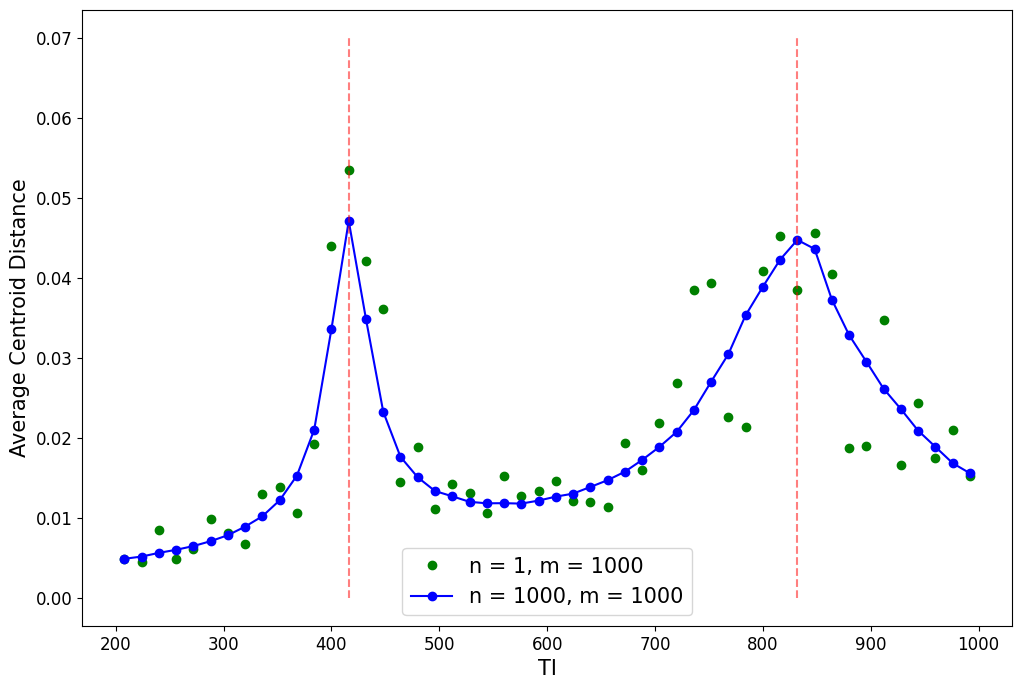

In [9]:
plt.plot(data.TIs, sample0, 'o', color = 'green', label = 'n = 1, m = 1000')
for TI in data.TIs:
    if TI in data.nullpts:
        plt.plot(TI, sample0[np.where(np.array(data.TIs) == TI)], color='red')

# plt.plot(data.TIs, sample2, 'o', color = 'purple', label = 'n = 1000, m = 10000')
# for TI in data.TIs:
#     if TI in data.nullpts:
#         plt.plot(TI, sample2[np.where(np.array(data.TIs) == TI)], color='red')


plt.plot(data.TIs, average_centroid_distances, '-o', color = 'blue', label = 'n = 1000, m = 1000')
for TI in data.TIs:
    if TI in data.nullpts:
        plt.plot(TI, average_centroid_distances[np.where(np.array(data.TIs) == TI)], color='red')
        # plot dashed vertical line
        plt.plot([TI, TI], [0, 0.07], '--', color = "red", alpha = 0.5)

# legend, green is "sample0", blue is "average_centroid_distances"
plt.legend(fontsize=15)

plt.xlabel('TI', fontsize=15)
plt.ylabel('Average Centroid Distance', fontsize=15)
# make axis scale size bigger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# bigger plot size
plt.gcf().set_size_inches(12, 8)